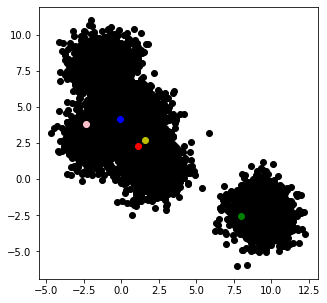

In [9]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

X, Y = make_blobs(n_samples=7000, n_features=2, centers=5, random_state=0)
df = pd.DataFrame({
    'x': [x for x, y in X], 
    'y': [y for x, y in X]
})

np.random.seed(200)

k = 5
centroids = {
    i+1: X[np.random.randint(0, 199)].tolist()
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))  
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y', 5: 'pink'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

In [2]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y', 5: 'pink'}
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [3]:
def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

In [4]:
df = assignment(df, centroids)
#closest_centroids = df['closest'].copy(deep=True)

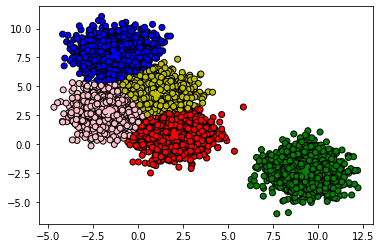

In [5]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
#
plt.scatter(df['x'], df['y'], color=df['color'], edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

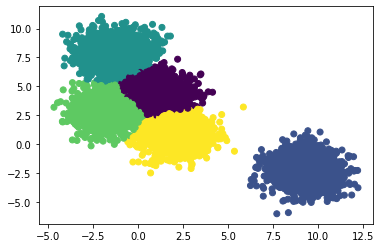

In [6]:
from sklearn.cluster import KMeans
a = KMeans(n_clusters=5, random_state=0).fit_predict( [(df['x'][i],df['y'][i]) for i in range(7000)])
plt.scatter(df['x'], df['y'], c=a)

Пункт 1

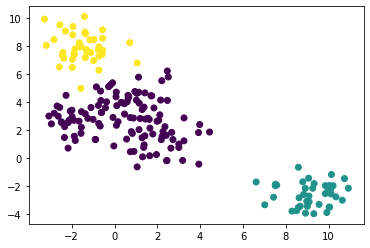

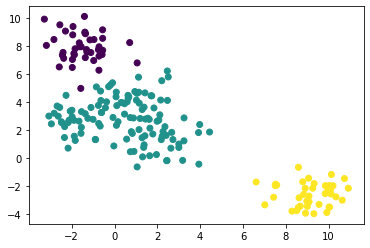

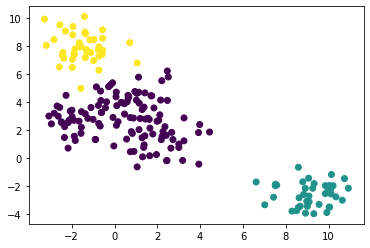

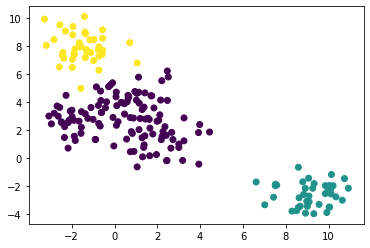

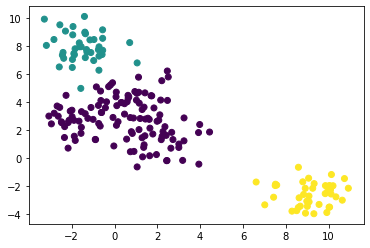

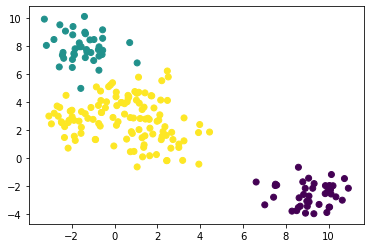

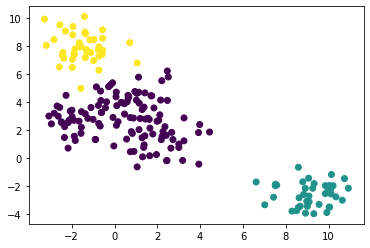

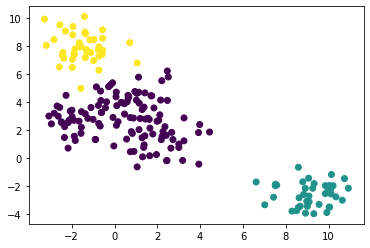

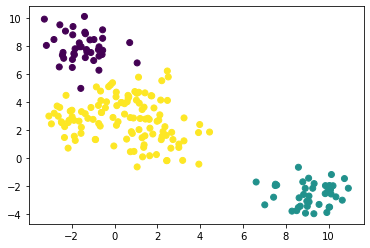

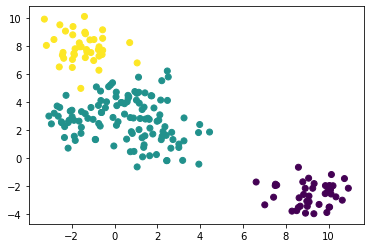

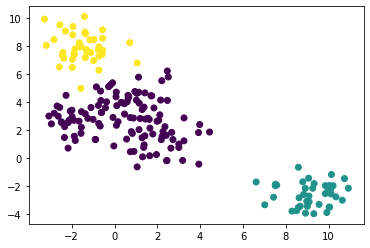

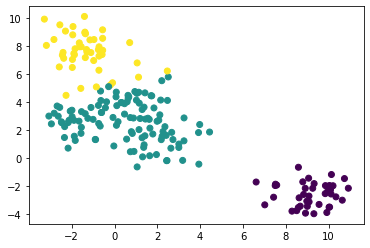

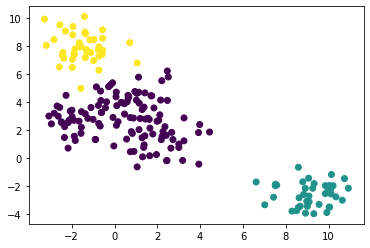

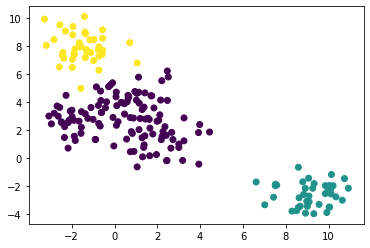

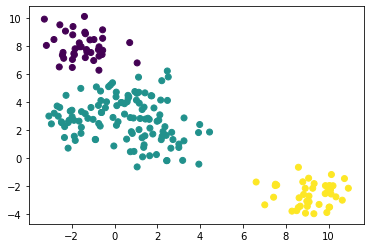

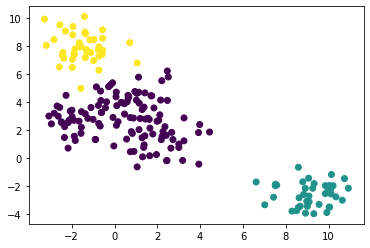

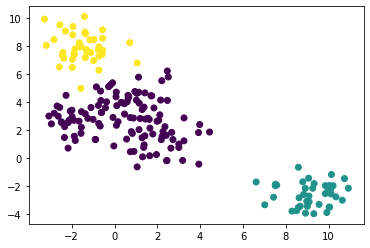

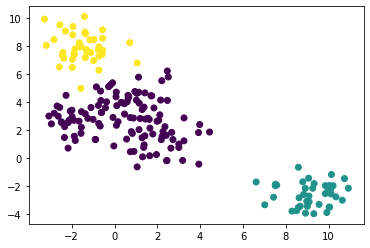

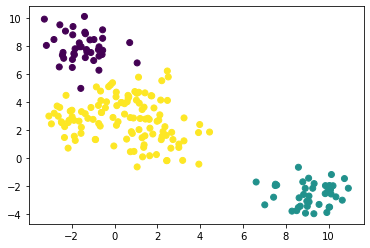

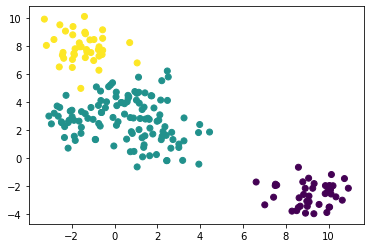

In [33]:
for rand_state in range(20):
    a = KMeans(n_clusters=3, random_state=rand_state).fit_predict( [(df['x'][i],df['y'][i]) for i in range(200)])
    plt.scatter(df['x'], df['y'], c=a)
    plt.show()

В данном случае при 20 разных random_state наша модель кластеризирует одинаковым образом. Следует эта кластеризация является наилучшей. В общем случае кластеризации могут получиться разные и лучшую нужно выбирать визуально.

Пункт 2

KMeans может кластеризировать только выпуклые множества
<center><img src='images/kmeans_2moons.png' width=800></center>

Пункт 3

For n_clusters = 2 The average silhouette_score is : 0.6668196583629802
For n_clusters = 3 The average silhouette_score is : 0.5368206679235259
For n_clusters = 4 The average silhouette_score is : 0.5264225658719873
For n_clusters = 5 The average silhouette_score is : 0.5559259838701844
For n_clusters = 6 The average silhouette_score is : 0.4964431429180167


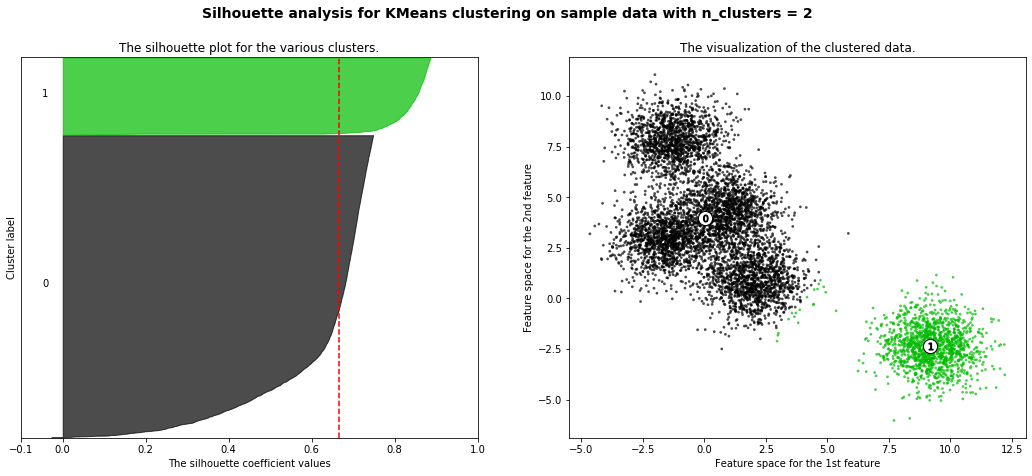

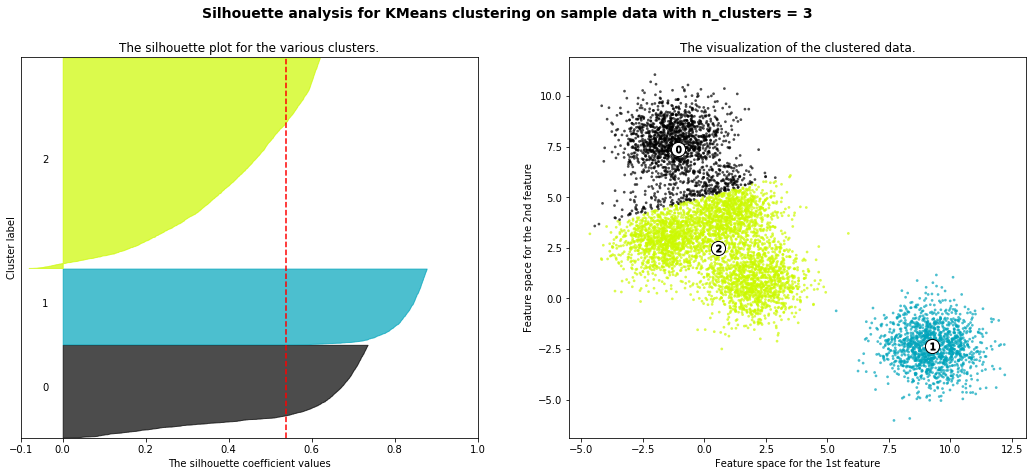

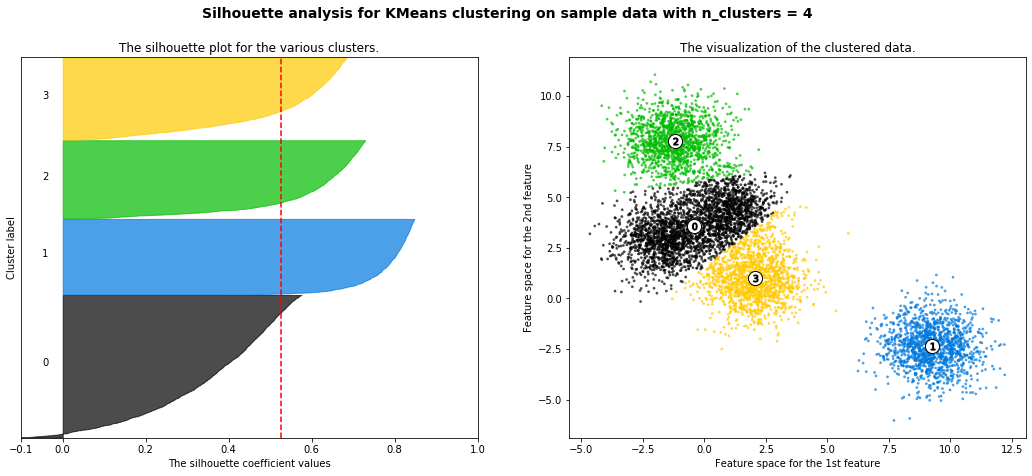

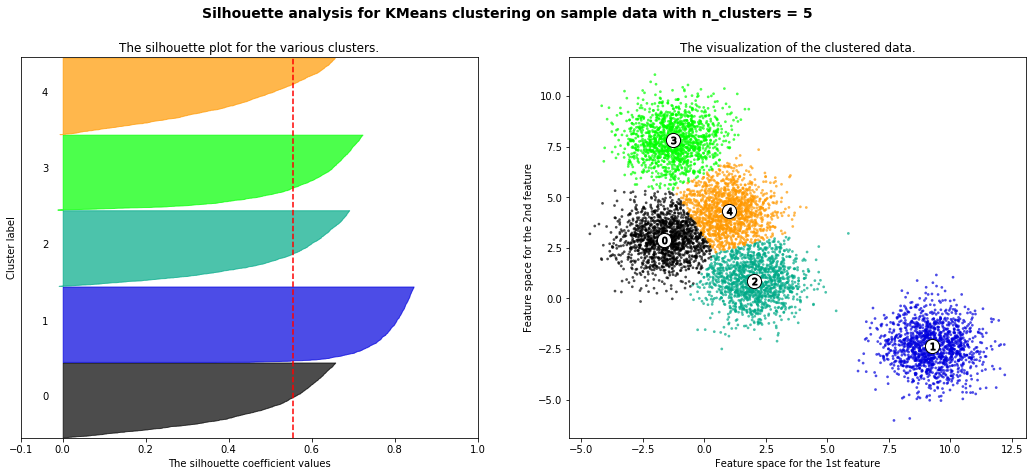

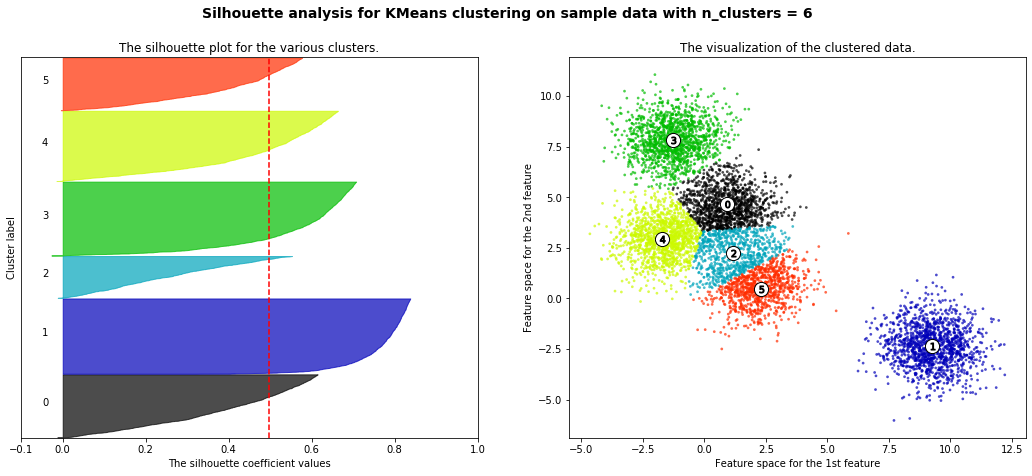

In [84]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, Y = make_blobs(n_samples=7000, n_features=2, centers=5, random_state=0)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<center><img src='images/sil1.png'></center>

<center><img src='images/sil2.png'></center>

Видим, что silhouette_score подсказывает выбрать параметр k равным 5

Пункт 4

In [13]:
depend = []
for i in range(2, 7):
    X, Y = make_blobs(n_samples=10**i, n_features=2, centers=5, random_state=0)
    df = pd.DataFrame({
        'x': [x for x, y in X], 
        'y': [y for x, y in X]
    })
    start_time = time.time()
    a = KMeans(n_clusters=3, random_state=0).fit_predict( [(df['x'][i],df['y'][i]) for i in range(10**i)])
    depend.append([10^i, time.time() - start_time])

In [12]:
depend

[[8, 0.038497209548950195],
 [9, 0.0591435432434082],
 [14, 0.3215146064758301],
 [15, 2.441593885421753]]

In [8]:
import time

--- 2.4976155757904053 seconds ---


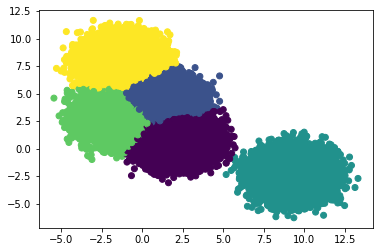

In [87]:
start_time = time.time()

a = KMeans(n_clusters=5, random_state=0).fit_predict( [(df['x'][i],df['y'][i]) for i in range(100000)])
plt.scatter(df['x'], df['y'], c=a)

print("--- %s seconds ---" % (time.time() - start_time))

Пункт 5

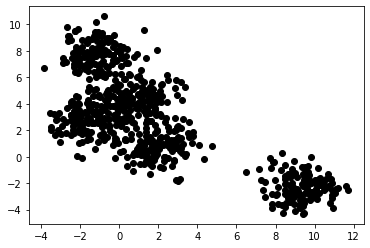

In [57]:
X, Y = make_blobs(n_samples=700, n_features=2, centers=5, random_state=0)
df = pd.DataFrame({
    'x': [x for x, y in X], 
    'y': [y for x, y in X]
})

np.random.seed(200)

k = 5
centroids = {
    i+1: X[np.random.randint(0, 199)].tolist()
    for i in range(k)
}
 
plt.scatter(df['x'], df['y'], color='k')

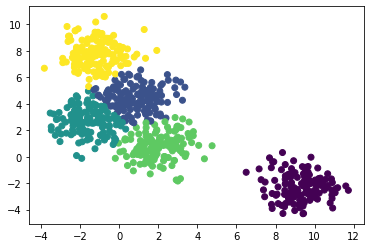

In [32]:
from sklearn.cluster import KMeans
a = KMeans(n_clusters=5, random_state=0).fit_predict( [(df['x'][i],df['y'][i]) for i in range(700)])
plt.scatter(df['x'], df['y'], c=a)

In [33]:
def distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [34]:
matrix = np.array([[distance((df['x'][i], df['y'][i]), (df['x'][j], df['y'][j])) for i in range(700)]for j in range(700)])

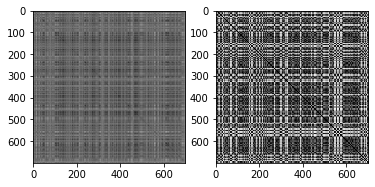

In [40]:
import matplotlib.cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(matrix, interpolation='bilinear', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(matrix, interpolation='nearest', cmap=cm.Greys_r)

plt.show()

In [59]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y', 5: 'pink'}
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [60]:
def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

In [61]:
df = assignment(df, centroids)
#closest_centroids = df['closest'].copy(deep=True)

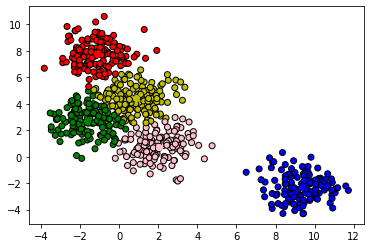

In [62]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
#
plt.scatter(df['x'], df['y'], color=df['color'], edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [117]:
df2 = df.sort_values(by=['closest'], ascending=True)

In [129]:
X = df2['x'].tolist()
Y = df2['y'].tolist()

In [130]:
matrix_2 = np.array([[distance((X[i], Y[i]), (X[j], [j])) for i in range(700)]for j in range(700)])

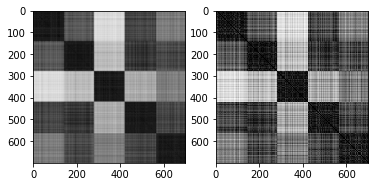

In [152]:
import matplotlib.cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(matrix_2, interpolation='bilinear', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(matrix_2, interpolation='nearest', cmap=cm.Greys_r)

plt.show()